In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pynocular as pn
from matplotlib import pyplot as plt

In [2]:
n = pn.PointData()
n['a'] = np.arange(10)
n['b'] = np.arange(20).reshape(-1,2)

In [3]:
n

a,0,1,2,3,4,5,6,7,8,9
b,[0 1],[2 3],[4 5],[6 7],[8 9],[10 11],[12 13],[14 15],[16 17],[18 19]


In [4]:
g = pn.GridData()

In [5]:
g['a'] = np.arange(10)

adding default grid


In [6]:
d = {'a':0}

In [7]:
list(d.items())[0]

('a', 0)

In [8]:
#g.grid['x'] = 33

In [9]:
g['b'] = np.arange(30).reshape(10,-1)

In [10]:
g

x,0,1,2,3,4,5,6,7,8,9
a,0,1,2,3,4,5,6,7,8,9
b,[0 1 2],[3 4 5],[6 7 8],[ 9 10 11],[12 13 14],[15 16 17],[18 19 20],[21 22 23],[24 25 26],[27 28 29]


In [11]:
g.flat('b')

masked_array(
  data=[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]],
  mask=False,
  fill_value=999999)

In [12]:
g.grid.size

10

In [13]:
g

x,0,1,2,3,4,5,6,7,8,9
a,0,1,2,3,4,5,6,7,8,9
b,[0 1 2],[3 4 5],[6 7 8],[ 9 10 11],[12 13 14],[15 16 17],[18 19 20],[21 22 23],[24 25 26],[27 28 29]


In [14]:
g['b'].ndim

2

In [15]:
import matplotlib.image as mpimg

img=mpimg.imread('on-fire.jpeg')

In [16]:
g = pn.GridData()

g['bw'] = np.average(img, axis=-1).T[:,::-1] / 255
g['img'] = img.swapaxes(0,1)[:,::-1,:] / 255.

adding default grid


In [17]:
g.grid.vars

['x', 'y']

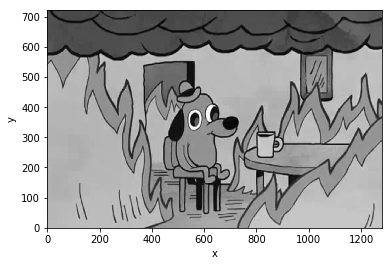

In [18]:
g.plot('bw', cmap='gray')

In [19]:
g.shape[3:]

()

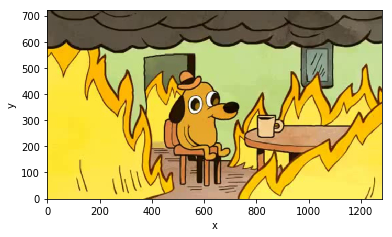

In [20]:
g.binwise(function='mean', x=0.5, y=0.5).plot('img')

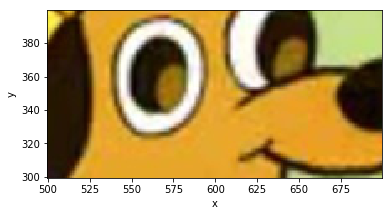

In [21]:
g[500:700, 300:400].plot('img')

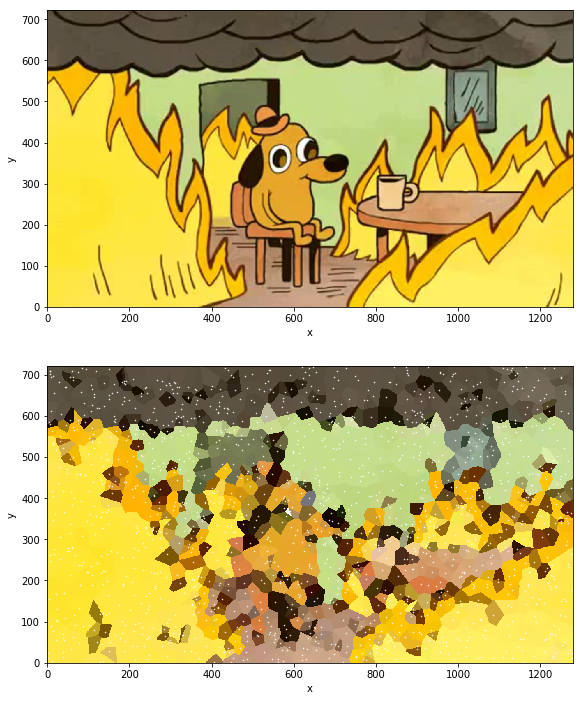

In [22]:
fig, ax = plt.subplots(2,1, figsize=(12,12))
g.plot('img', ax=ax[0])

N=1500
pd = pn.PointData(x=np.random.rand(N)*g.grid['x'].edges.max(), y=np.random.rand(N)*g.grid['y'].edges.max())
g.lookup(pd).interp(g, method='nearest').plot('img', ax=ax[1])
pd.plot('x', 'y', '.', color='w', ax=ax[1], ms=1)

In [23]:
#%%timeit
#g.lookup(pd).interp(g, method='nearest')

In [24]:
g.vars

['x', 'y', 'bw', 'img']

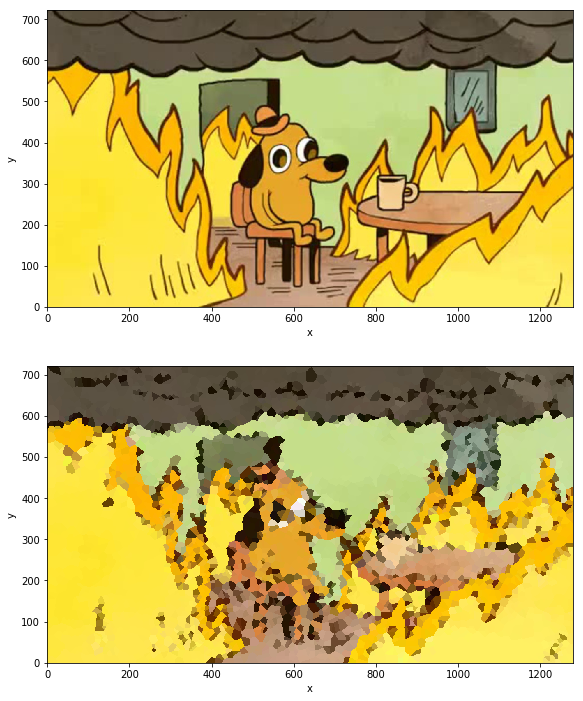

In [25]:
fig, ax = plt.subplots(2,1, figsize=(12,12))
g.plot('img', ax=ax[0])

N=5000
pd = pn.PointData()
pd['x'] = np.random.rand(N)*g.grid['x'].edges.max()
pd['y'] = np.random.rand(N)*g.grid['y'].edges.max()
pd['img'] = g.lookup(pd)['img']
g['voronoi'] = pd.interp(g, method='nearest')['img']
g.plot('voronoi', ax=ax[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


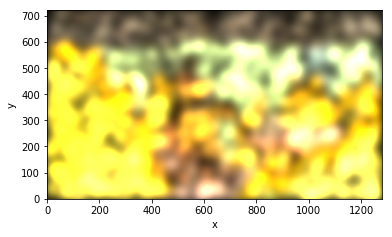

In [26]:
pk = pd.kde(x=1000, y=1000, bw=20, density=False, kernel='gaussian')
pk['img'] /= np.max(pk['img']) / 2
#pk['img_exp'] = np.exp(pk['img'])
#pk['img_exp'] /= np.max(pk['img_exp'])
pk.plot('img')

In [27]:
np.arange(12).reshape(3,4)[..., np.newaxis]

array([[[ 0],
        [ 1],
        [ 2],
        [ 3]],

       [[ 4],
        [ 5],
        [ 6],
        [ 7]],

       [[ 8],
        [ 9],
        [10],
        [11]]])

In [28]:
pk

y \ x,[0.078 1.357],[1.357 2.637],[2.637 3.916],[3.916 5.195],[5.195 6.475],[6.475 7.754],...,[1271.783 1273.062],[1273.062 1274.341],[1274.341 1275.621],[1275.621 1276.9 ],[1276.9 1278.18],[1278.18 1279.459]
[0.067 0.788],img = [0.202 0.183 0.053]counts = 0.00171,img = [0.209 0.19 0.055]counts = 0.00177,img = [0.216 0.196 0.056]counts = 0.00183,img = [0.222 0.202 0.058]counts = 0.00188,img = [0.228 0.207 0.06 ]counts = 0.00193,img = [0.234 0.213 0.061]counts = 0.00198,...,img = [0.576 0.542 0.227]counts = 0.00496,img = [0.547 0.515 0.215]counts = 0.0047,img = [0.518 0.487 0.203]counts = 0.00445,img = [0.489 0.46 0.192]counts = 0.0042,img = [0.46 0.434 0.18 ]counts = 0.00395,img = [0.432 0.407 0.169]counts = 0.0037
[0.788 1.51 ],img = [0.209 0.19 0.055]counts = 0.00177,img = [0.216 0.197 0.057]counts = 0.00183,img = [0.223 0.203 0.058]counts = 0.00189,img = [0.23 0.209 0.06 ]counts = 0.00195,img = [0.237 0.215 0.062]counts = 0.00201,img = [0.243 0.221 0.064]counts = 0.00206,...,img = [0.59 0.555 0.232]counts = 0.00508,img = [0.56 0.527 0.22 ]counts = 0.00482,img = [0.53 0.499 0.208]counts = 0.00455,img = [0.501 0.471 0.196]counts = 0.0043,img = [0.471 0.444 0.185]counts = 0.00404,img = [0.442 0.417 0.173]counts = 0.00379
[1.51 2.231],img = [0.216 0.197 0.057]counts = 0.00183,img = [0.224 0.204 0.059]counts = 0.0019,img = [0.232 0.21 0.06 ]counts = 0.00196,img = [0.239 0.217 0.062]counts = 0.00202,img = [0.245 0.223 0.064]counts = 0.00208,img = [0.252 0.229 0.066]counts = 0.00213,...,img = [0.604 0.568 0.237]counts = 0.00519,img = [0.573 0.539 0.225]counts = 0.00493,img = [0.542 0.51 0.213]counts = 0.00466,img = [0.512 0.482 0.201]counts = 0.0044,img = [0.482 0.454 0.189]counts = 0.00413,img = [0.452 0.426 0.177]counts = 0.00388
[2.231 2.952],img = [0.224 0.203 0.058]counts = 0.0019,img = [0.232 0.211 0.06 ]counts = 0.00196,img = [0.24 0.218 0.062]counts = 0.00203,img = [0.247 0.225 0.064]counts = 0.00209,img = [0.254 0.231 0.066]counts = 0.00215,img = [0.261 0.237 0.068]counts = 0.00221,...,img = [0.617 0.58 0.242]counts = 0.00531,img = [0.586 0.551 0.23 ]counts = 0.00504,img = [0.554 0.522 0.217]counts = 0.00476,img = [0.523 0.493 0.205]counts = 0.00449,img = [0.493 0.464 0.193]counts = 0.00423,img = [0.462 0.435 0.181]counts = 0.00396
[2.952 3.674],img = [0.232 0.21 0.06 ]counts = 0.00196,img = [0.24 0.218 0.062]counts = 0.00203,img = [0.248 0.225 0.065]counts = 0.0021,img = [0.256 0.233 0.067]counts = 0.00217,img = [0.263 0.239 0.069]counts = 0.00223,img = [0.271 0.246 0.07 ]counts = 0.00229,...,img = [0.63 0.592 0.247]counts = 0.00542,img = [0.598 0.562 0.235]counts = 0.00514,img = [0.566 0.533 0.222]counts = 0.00486,img = [0.534 0.503 0.209]counts = 0.00459,img = [0.503 0.474 0.197]counts = 0.00432,img = [0.472 0.445 0.185]counts = 0.00405
[3.674 4.395],img = [0.239 0.218 0.062]counts = 0.00203,img = [0.248 0.226 0.065]counts = 0.0021,img = [0.257 0.233 0.067]counts = 0.00218,img = [0.265 0.241 0.069]counts = 0.00225,img = [0.273 0.248 0.071]counts = 0.00231,img = [0.28 0.255 0.073]counts = 0.00237,...,img = [0.643 0.604 0.252]counts = 0.00554,img = [0.61 0.574 0.239]counts = 0.00525,img = [0.578 0.543 0.226]counts = 0.00496,img = [0.545 0.513 0.214]counts = 0.00468,img = [0.513 0.483 0.201]counts = 0.0044,img = [0.482 0.454 0.188]counts = 0.00413
...,...,...,...,...,...,...,...,...,...,...,...,...,...
[717.02 717.741],img = [0.057 0.05 0.039]counts = 0.00158,img = [0.061 0.054 0.042]counts = 0.00171,img = [0.066 0.058 0.045]counts = 0.00184,img = [0.071 0.063 0.048]counts = 0.00198,img = [0.076 0.068 0.052]counts = 0.00213,img = [0.082 0.073 0.055]counts = 0.00228,...,img = [0.135 0.121 0.095]counts = 0.00335,img = [0.131 0.118 0.092]counts = 0.00325,img = [0.127 0.114 0.089]counts = 0.00315,img = [0.123 0.11 0.086]counts = 0.00305,img = [0.119 0.106 0.083]counts = 0.00294,img = [0.114 0.102 0.08 ]counts = 0.00283
[717.741 718.462],img = [0.055 0.049 0.037]counts = 0.00154,img = [0.06 0.053 0.04 ]counts = 0.00167,img = [

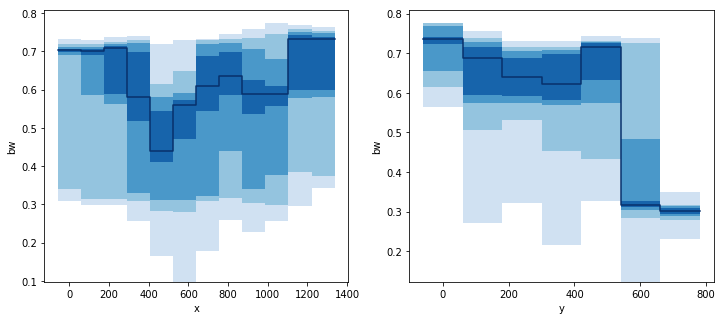

In [29]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], x=0.01).plot_bands('bw', ax=ax[0])
g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], y=0.01).plot_bands('bw', ax=ax[1])

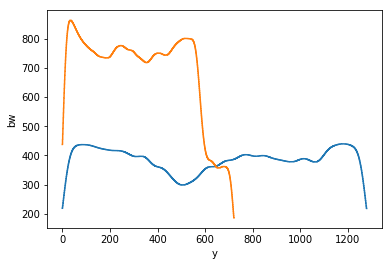

In [30]:
#g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], x=0.01).plot_bands('bw')
g.kde(x=1000, density=False).plot('bw')
g.kde(y=1000, density=False).plot('bw')

In [31]:
g['img'].shape

(1280, 722, 3)

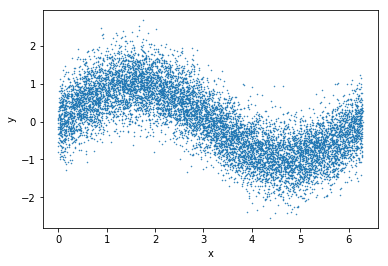

In [32]:
p = pn.PointData()
p['x'] = np.random.rand(10000) * 2 * np.pi
p['y'] = np.sin(p['x']) + np.random.randn(p.array_shape[0]) * 0.5
p.plot('.', ms=1)

In [33]:
p['density'] = p.histogram(x=10, y=10).interp(x=100, y=100).lookup(p)['counts']

In [34]:
p

x,1.17,1.76,4.49,2.42,5.43,5.1,...,4.37,4.52,3.76,1.26,1.92,6.07
y,0.673,0.768,-0.64,0.31,-0.688,-0.288,...,-0.906,-1.23,-0.895,1.11,1.78,-0.69
density,355,389,316,315,402,202,...,363,345,308,350,105,nan


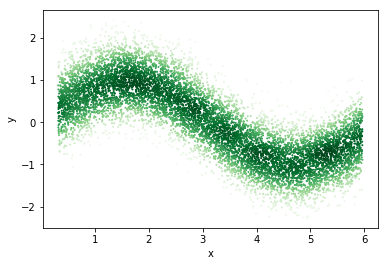

In [35]:
p.plot_scatter('x', 'y', 'density', s=1, cmap='Greens')

/home/peller/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


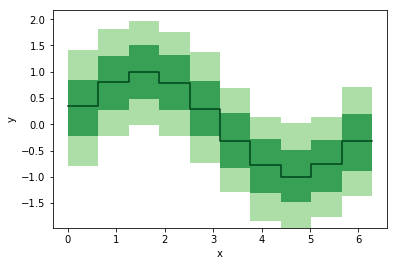

In [36]:
p.binwise(function=lambda x : np.percentile(x, [2.5, 16, 50, 84, 97.5]), x=10).plot_bands('y', cmap='Greens')
#p.plot('x', 'y', '.', color='b', ms=1)

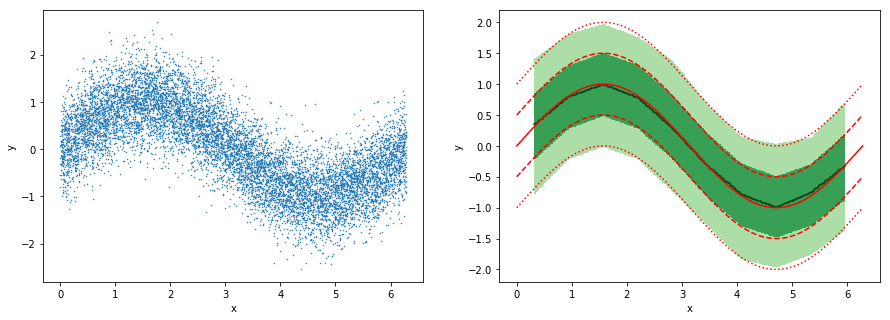

In [37]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

p.plot('x', 'y', '.', ms=1, ax=ax[0])
p.binwise(function=lambda x : np.percentile(x, [2.5, 16, 50, 84, 97.5]), x=10).interp(x=200, method='linear', fill_value=np.nan).plot_bands('y', cmap='Greens', ax=ax[1])

# truth
x = np.linspace(0, 2*np.pi, 1000)
ax[1].plot(x, np.sin(x), color='red')
ax[1].plot(x, np.sin(x)+0.5, '--', color='red')
ax[1].plot(x, np.sin(x)-0.5, '--', color='red')
ax[1].plot(x, np.sin(x)+1, ':', color='red')
ax[1].plot(x, np.sin(x)-1, ':', color='red')

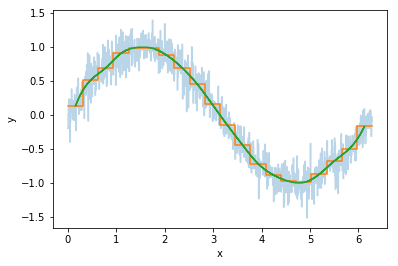

In [38]:
p.binwise(function='mean', x=1000).plot('y', alpha=0.3)
p.binwise(function='mean', x=20).plot('y')
p.binwise(function='mean', x=20).interp(method='cubic', x=1000).plot('y')

In [39]:
s = pn.GridData()
s.grid['x'].points = np.linspace(0, 3 * np.pi, 20)
s.grid['y'].points = np.linspace(0, 3 * np.pi, 20)
s['z'] = np.cos(s['x']) * np.cos(s['y'])

needs to be checked, is weird behaviour
needs to be checked, is weird behaviour


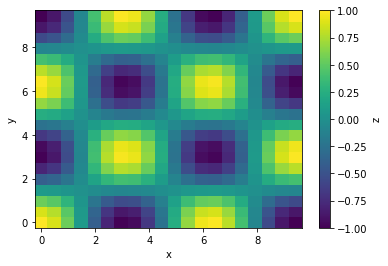

In [40]:
s.plot(cbar=True)

In [41]:
s['z']

y \ x,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
0,1,0.879,0.547,0.0826,-0.402,-0.789,...,0.789,0.402,-0.0826,-0.547,-0.879,-1
0.496,0.879,0.773,0.481,0.0726,-0.353,-0.694,...,0.694,0.353,-0.0726,-0.481,-0.773,-0.879
0.992,0.547,0.481,0.299,0.0452,-0.22,-0.432,...,0.432,0.22,-0.0452,-0.299,-0.481,-0.547
1.49,0.0826,0.0726,0.0452,0.00682,-0.0332,-0.0652,...,0.0652,0.0332,-0.00682,-0.0452,-0.0726,-0.0826
1.98,-0.402,-0.353,-0.22,-0.0332,0.161,0.317,...,-0.317,-0.161,0.0332,0.22,0.353,0.402
2.48,-0.789,-0.694,-0.432,-0.0652,0.317,0.623,...,-0.623,-0.317,0.0652,0.432,0.694,0.789
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.94,0.789,0.694,0.432,0.0652,-0.317,-0.623,...,0.623,0.317,-0.0652,-0.432,-0.694,-0.789
7.44,0.402,0.353,0.22,0.0332,-0.161,-0.317,...,0.317,0.161,-0.0332,-0.22,-0.353,-0.402
7.94,-0.0826,-0.0726,-0.0452,-0.00682,0.0332,0.0652,...,-0.0652,-0.0332,0.00682,0.0452,0.0726,0.0826


In [42]:
np.max(s['z'], axis='x')

y,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
,1,0.879,0.547,0.0826,0.402,0.789,...,0.789,0.402,0.0826,0.547,0.879,1


In [43]:
np.square(s['z'])

y \ x,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
0,1,0.773,0.299,0.00682,0.161,0.623,...,0.623,0.161,0.00682,0.299,0.773,1
0.496,0.773,0.598,0.231,0.00527,0.125,0.482,...,0.482,0.125,0.00527,0.231,0.598,0.773
0.992,0.299,0.231,0.0895,0.00204,0.0483,0.186,...,0.186,0.0483,0.00204,0.0895,0.231,0.299
1.49,0.00682,0.00527,0.00204,4.65e-05,0.0011,0.00425,...,0.00425,0.0011,4.65e-05,0.00204,0.00527,0.00682
1.98,0.161,0.125,0.0483,0.0011,0.026,0.1,...,0.1,0.026,0.0011,0.0483,0.125,0.161
2.48,0.623,0.482,0.186,0.00425,0.1,0.388,...,0.388,0.1,0.00425,0.186,0.482,0.623
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.94,0.623,0.482,0.186,0.00425,0.1,0.388,...,0.388,0.1,0.00425,0.186,0.482,0.623
7.44,0.161,0.125,0.0483,0.0011,0.026,0.1,...,0.1,0.026,0.0011,0.0483,0.125,0.161
7.94,0.00682,0.00527,0.00204,4.65e-05,0.0011,0.00425,...,0.00425,0.0011,4.65e-05,0.00204,0.00527,0.00682


In [44]:
np.sum(s['z'], axis='y')

x,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
,-5.55e-16,-6.66e-16,0,0,5.55e-17,7.77e-16,...,-2.22e-16,-2.22e-16,4.16e-17,4.44e-16,6.66e-16,5.55e-16


In [45]:
np.mean(s['z'], axis='x')

y,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
,-2.78e-17,-3.33e-17,0,-1.39e-18,1.39e-17,2.78e-17,...,-3.33e-17,0,3.47e-18,2.22e-17,3.33e-17,2.78e-17


In [46]:
s['z'].mean(axis='x')

y,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
,-2.78e-17,-3.33e-17,0,-1.39e-18,1.39e-17,2.78e-17,...,-3.33e-17,0,3.47e-18,2.22e-17,3.33e-17,2.78e-17


In [47]:
s['x']

y \ x,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
0,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
0.496,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
0.992,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
1.49,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
1.98,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
2.48,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.94,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
7.44,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
7.94,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42


In [48]:
test = pn.GridData()#x=[0,1,2], y=[0,1,2,3])

In [49]:
test['a'] = np.arange(6).reshape(2,3)
test['b'] = np.zeros_like(test['a'])

adding default grid


In [80]:
test

y \ x,0,1
0,a = 0b = 0,a = 3b = 0
1,a = 1b = 0,a = 4b = 0
2,a = 2b = 0,a = 5b = 0


In [81]:
test['a']

y \ x,0,1
0,0,3
1,1,4
2,2,5


In [82]:
test['a'].T

x \ y,0,1,2
0,0,1,2
1,3,4,5


In [83]:
np.mean(test['a'], axis='x')

y,0,1,2
,1.5,2.5,3.5


In [84]:
np.sum(test['b'], axis='x')

y,0,1,2
,0,0,0


In [85]:
np.square(test['a'])

y \ x,0,1
0,0,9
1,1,16
2,4,25


In [86]:
np.max(test['a'], axis='x')

y,0,1,2
,3,4,5


In [87]:
test['a']

y \ x,0,1
0,0,3
1,1,4
2,2,5


In [88]:
test['a'][test['x'] > 1]

y \ x,0,1
0,--,--
1,--,--
2,--,--


In [89]:
test.grid['x'].edges

edges: array([[-0.5,  0.5],
       [ 0.5,  1.5]])

In [90]:
test['a']

y \ x,0,1
0,0,3
1,1,4
2,2,5


In [91]:
test['a'][test['x'] >= test['y']] + test['a']

y \ x,0,1
0,0,6
1,--,8
2,--,--


In [92]:
test['a']

y \ x,0,1
0,0,3
1,1,4
2,2,5


In [93]:
#(test['a'] + 
(test['a'][test['x'] == test['y']])

y \ x,0,1
0,0,--
1,--,4
2,--,--


In [94]:
np.sum(test['a'][test['x'] == test['y']])

4

In [95]:
test['a'] + test['a'][test['a'] > 3] * 3.

y \ x,0,1
0,--,--
1,--,16
2,--,20


In [96]:
test['a'][test['a'] > 3] += test['a'][test['a'] > 4] 

In [97]:
test['a'] *= -1

In [98]:
test['a']

y \ x,0,1
0,0,-3
1,-1,-4
2,-2,-10


In [99]:
test['a'][0,:] *= -1

In [100]:
test['a']

y \ x,0,1
0,0,-3
1,1,-4
2,2,-10


In [101]:
(test['a'].data * 300)

array([[    0,   300,   600],
       [ -900, -1200, -3000]])

In [102]:
test['a'] ** 2

y \ x,0,1
0,0,9
1,1,16
2,4,100


In [103]:
str(test['a'][0])
test['a'][0].shape
test['a'].ndim

2

In [104]:
test['a'].grid[0]

Grid(
Axis("y",
points = array([0, 1, 2]),
edges = edges: None)
nbins = 3),)

In [105]:
test['a'][0,[0]]

y,0
,0


In [106]:
test[0,0]

{'a': 0, 'b': 0}

In [107]:
test['a'].data[[0],[0],np.newaxis]

array([[0]])

In [108]:
np.std(test['a'], axis='x')

y,0,1,2
,1.5,2.5,6


In [109]:
np.sum(test['a'])

-14

In [110]:
l = np.arange(10)

In [111]:
l

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [112]:
mask = l > 5

In [113]:
mask

array([False, False, False, False, False, False,  True,  True,  True,
        True])

In [114]:
['%s'%s for s in np.asanyarray(np.ma.MaskedArray(l, mask))]

['0', '1', '2', '3', '4', '5', '--', '--', '--', '--']

In [115]:
ma = np.ma.MaskedArray(l, mask)

In [116]:
(-np.ones(10) * np.asanyarray(ma)).data

array([-0., -1., -2., -3., -4., -5., -1., -1., -1., -1.])

In [117]:
np.array(ma) * -1

array([ 0, -1, -2, -3, -4, -5, -6, -7, -8, -9])

In [118]:
np.asarray(ma)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [119]:
np.asanyarray(ma)

masked_array(data=[0, 1, 2, 3, 4, 5, --, --, --, --],
             mask=[False, False, False, False, False, False,  True,  True,
                    True,  True],
       fill_value=999999)

In [120]:
ma.mask

array([False, False, False, False, False, False,  True,  True,  True,
        True])

In [121]:
np.sum(test['a'])

-14

In [122]:
np.sum(ma)

15

In [123]:
ma

masked_array(data=[0, 1, 2, 3, 4, 5, --, --, --, --],
             mask=[False, False, False, False, False, False,  True,  True,
                    True,  True],
       fill_value=999999)

In [124]:
axis = (1,)

In [125]:
axis

(1,)

In [126]:
axis[0] = 3

TypeError: 'tuple' object does not support item assignment

In [127]:
any(sorted((1,4,3)) < 3)

TypeError: '<' not supported between instances of 'list' and 'int'

In [128]:
np.arange(12)[:,np.newaxis]

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])

In [129]:
np.arange(12)[:,np.newaxis] @ np.arange(12)[:,np.newaxis].T

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11],
       [  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22],
       [  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33],
       [  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44],
       [  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55],
       [  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66],
       [  0,   7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77],
       [  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88],
       [  0,   9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99],
       [  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110],
       [  0,  11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121]])

In [130]:
blah=33.000
f'ldasdhadh {blah:.2g} {blah}'

'ldasdhadh 33 33.0'

In [131]:
'test %ff'%{ff:33}

NameError: name 'ff' is not defined